In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
tree_df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

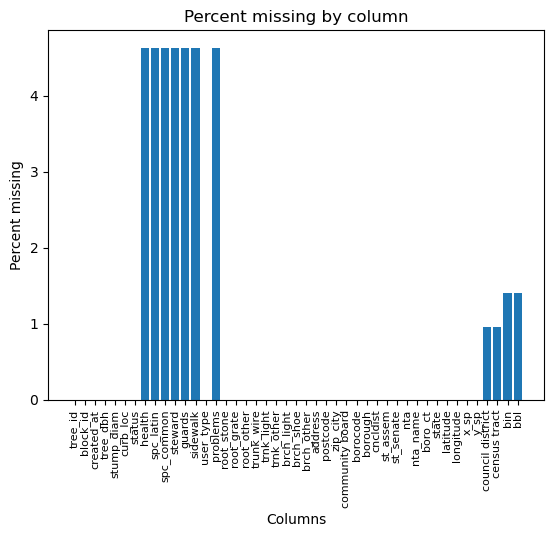

In [4]:
vals = (tree_df.isna().sum() * 100 / len(tree_df)).values
keys = tree_df.columns
plt.tight_layout()
plt.bar(keys, vals)
plt.xlabel("Columns")
plt.ylabel("Percent missing")
plt.xticks(rotation=90, fontsize=8)
plt.title("Percent missing by column")
plt.show()

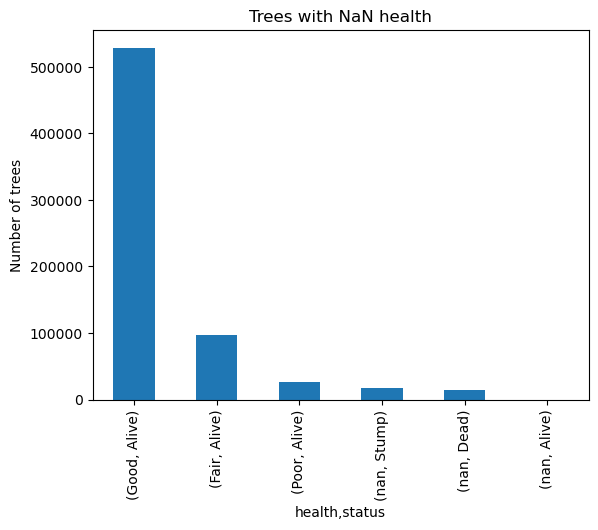

In [5]:
tree_df[['health', 'status']].value_counts(dropna=False).plot(kind='bar')
plt.title('Trees with NaN health')
plt.ylabel("Number of trees")
plt.show()  # Trees with NaN health are dead or stumps, drop them.

In [7]:
tree_df.shape

(683788, 45)

In [8]:
tree_df_clean = tree_df[tree_df['health'].notna()]
tree_df_clean.shape

(652172, 45)

In [9]:
print("Dead or stumps:", tree_df.shape[0] - tree_df_clean.shape[0])

Dead or stumps: 31616


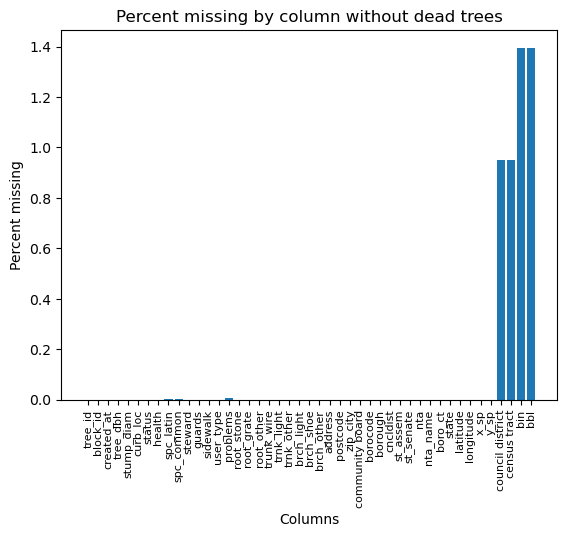

In [10]:
vals = (tree_df_clean.isna().sum() * 100 / len(tree_df_clean)).values
keys = tree_df_clean.columns
plt.tight_layout()
plt.bar(keys, vals)
plt.xlabel("Columns")
plt.ylabel("Percent missing")
plt.xticks(rotation=90, fontsize=8)
plt.title("Percent missing by column without dead trees")
plt.show()

In [93]:
'''
Dropped columns:
- borocode and boro_ct, equivalent to borough
- x_sp and y_sp - use latitude and longitude instead
- state - identical for all
- nta_name, equivalent to nta
- zip_city, directly correlated to postcode
- address, estimated from latitude and longitude
- spc_latin, equivalent to spc_common
- created_at, not helpful (time data was added)
- tree_id, not helpful (unique identifier)
- block_id, not helpful (geo location)
- user_type, not helpful (which volunteer analyzed it)
- bin, not helpful (building identifier)
- bbl, not helpful (block identifier)
- council district, equivalent to cncldist
- census tract, missing values and other location data
- problems, one-hot encoded in other values
- status, all are alive after dropping dead and stumps
- stump_diam, only applies to stumps
'''

tree_df_dropped = tree_df_clean.drop(columns=[
    'borocode', 'x_sp', 'y_sp', 'state', 'nta_name', 'zip_city', 'address',
    'spc_latin', 'created_at', 'tree_id', 'block_id', 'user_type', 'bin',
    'bbl', 'council district', 'boro_ct', 'census tract', 'problems', 'status',
    'stump_diam'
])

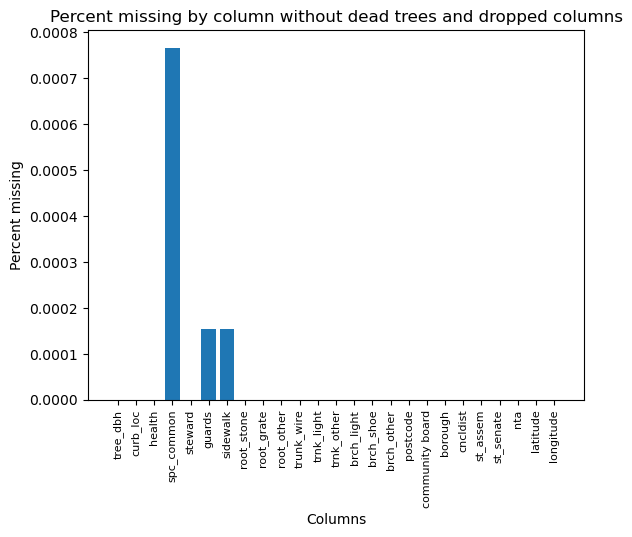

In [94]:
vals = (tree_df_dropped.isna().sum() * 100 / len(tree_df_dropped)).values
keys = tree_df_dropped.columns
plt.tight_layout()
plt.bar(keys, vals)
plt.xlabel("Columns")
plt.ylabel("Percent missing")
plt.xticks(rotation=90, fontsize=8)
plt.title("Percent missing by column without dead trees and dropped columns")
plt.show() # There are only 6 trees with missing values, just drop them

In [144]:
tree_df_processed = tree_df_dropped.dropna(how='any')
print("Trees with missing values:", tree_df_dropped.shape[0] - tree_df_processed.shape[0])
miss_val = tree_df_processed.shape[0]

# Invalid zipcode
tree_df_processed = tree_df_processed[tree_df_processed['postcode'] != 83]
print("Trees with invalid zipcodes values:", miss_val - tree_df_processed.shape[0])

Trees with missing values: 6
Trees with invalid zipcodes values: 932


In [146]:
tree_df_processed.shape

(651234, 25)

In [148]:
tree_df_processed.columns

Index(['tree_dbh', 'curb_loc', 'health', 'spc_common', 'steward', 'guards',
       'sidewalk', 'root_stone', 'root_grate', 'root_other', 'trunk_wire',
       'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other',
       'postcode', 'community board', 'borough', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'latitude', 'longitude'],
      dtype='object')

In [147]:
tree_df_processed

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,community board,borough,cncldist,st_assem,st_senate,nta,latitude,longitude
0,3,OnCurb,Fair,red maple,None,None,NoDamage,No,No,No,No,No,No,No,No,No,11375,406,Queens,29,28,16,QN17,40.723092,-73.844215
1,21,OnCurb,Fair,pin oak,None,None,Damage,Yes,No,No,No,No,No,No,No,No,11357,407,Queens,19,27,11,QN49,40.794111,-73.818679
2,3,OnCurb,Good,honeylocust,1or2,None,Damage,No,No,No,No,No,No,No,No,No,11211,301,Brooklyn,34,50,18,BK90,40.717581,-73.936608
3,10,OnCurb,Good,honeylocust,None,None,Damage,Yes,No,No,No,No,No,No,No,No,11211,301,Brooklyn,34,53,18,BK90,40.713537,-73.934456
4,21,OnCurb,Good,American linden,None,None,Damage,Yes,No,No,No,No,No,No,No,No,11215,306,Brooklyn,39,44,21,BK37,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,OnCurb,Good,pin oak,None,None,Damage,No,No,No,No,No,No,No,No,No,11211,301,Brooklyn,34,53,18,BK73,40.713211,-73.954944
683784,7,OnCurb,Good,Kentucky yellowwood,1or2,None,NoDamage,No,No,No,No,No,No,No,No,No,11375,406,Queens,29,28,15,QN17,40.715194,-73.856650
683785,12,OnCurb,Good,red maple,None,None,Damage,No,No,No,No,No,No,No,No,No,10314,501,Staten Island,50,63,24,SI07,40.620762,-74.136517
683786,9,OnCurb,Good,red maple,None,None,NoDamage,No,No,No,No,No,No,No,No,No,10457,205,Bronx,15,86,33,BX41,40.850828,-73.903115


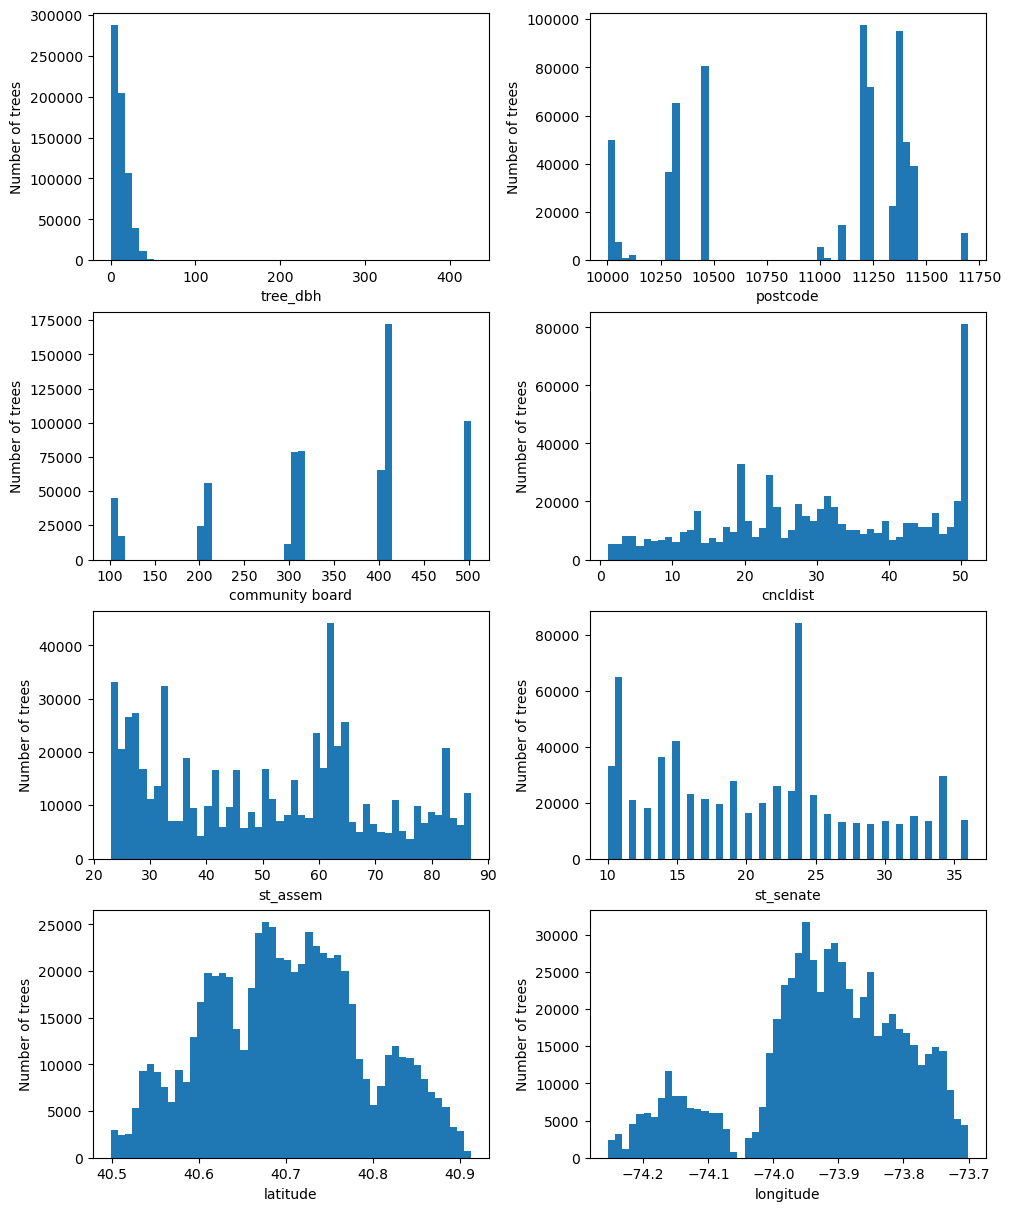

In [191]:
vals = [
    'tree_dbh', 'postcode', 'community board', 'cncldist', 'st_assem',
    'st_senate', 'latitude', 'longitude'
]
fig, axs = plt.subplots(len(vals) // 2, 2, figsize=(10, 12), constrained_layout=True)
#fig.tight_layout()

for i, val in enumerate(vals):
    axs[i // 2, i % 2].hist(tree_df_processed[val], bins=50)
    axs[i // 2, i % 2].set(xlabel=val, ylabel="Number of trees")

plt.show()

In [198]:
def cat_plot(feature, ax):
    df = tree_df_processed[['health', feature]].value_counts().to_frame()
    df = df.unstack(level=0)
    df.columns = ['Fair', 'Good', 'Poor']
    df.plot(kind='bar', ax=ax)

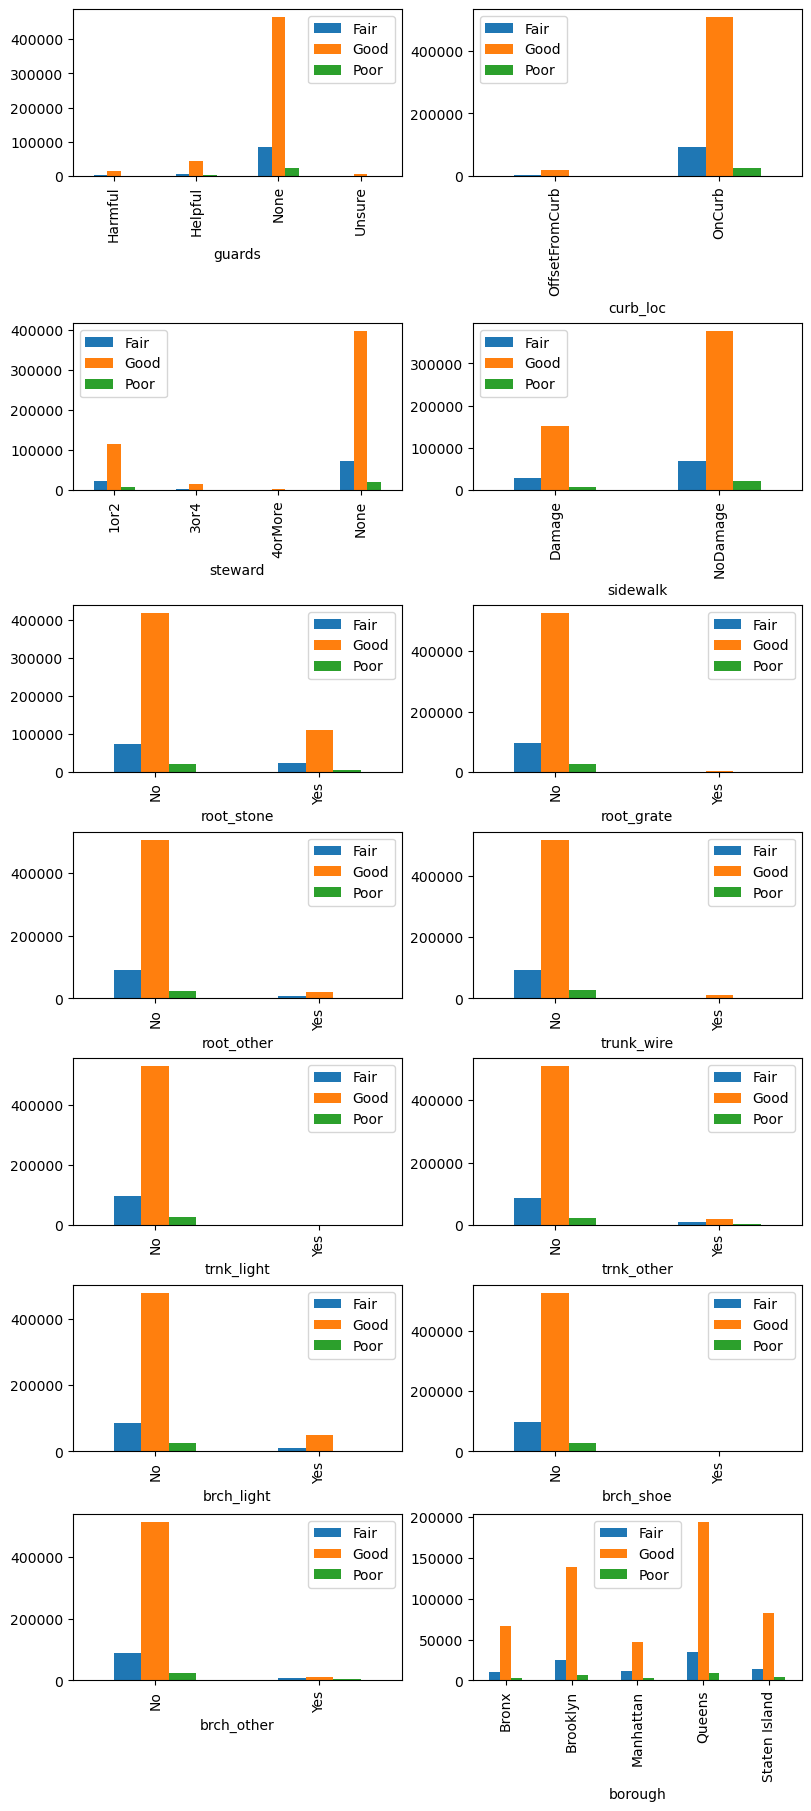

In [200]:
vals = [
    'guards', 'curb_loc', 'steward', 'sidewalk', 'root_stone', 'root_grate',
    'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
    'brch_other', 'borough'
]
fig, axs = plt.subplots(len(vals) // 2, 2, figsize=(8, 18), constrained_layout=True)

for i, val in enumerate(vals):
    cat_plot(val, axs[i // 2, i % 2])

plt.show()

In [107]:
# Ordinal encoding
tree_df_encoded = tree_df_processed.copy(deep=True)

health = ['Poor', 'Fair', 'Good']
enc = OrdinalEncoder(categories=[health])
tree_df_encoded['health'] = enc.fit_transform(tree_df_processed[['health']])

steward = ['None', '1or2', '3or4', '4orMore']
enc = OrdinalEncoder(categories=[steward])
tree_df_encoded['steward'] = enc.fit_transform(tree_df_encoded[['steward']])

sidewalk = ['NoDamage', 'Damage']
enc = OrdinalEncoder(categories=[sidewalk])
tree_df_encoded['sidewalk'] = enc.fit_transform(tree_df_encoded[['sidewalk']])

curbloc = ['OnCurb', 'OffsetFromCurb']
enc = OrdinalEncoder(categories=[curbloc])
tree_df_encoded['curb_loc'] = enc.fit_transform(tree_df_encoded[['curb_loc']])

yes_no = ['No', 'Yes']
enc = OrdinalEncoder(categories=[yes_no])

yes_no_features = [
    'brch_other', 'brch_shoe', 'brch_light', 'trnk_other', 'trnk_light',
    'trunk_wire', 'root_other', 'root_grate', 'root_stone'
]

for feat in yes_no_features:
    tree_df_encoded[feat] = enc.fit_transform(tree_df_encoded[[feat]])
    
# One-hot encode
enc = OneHotEncoder()
guards = enc.fit_transform(tree_df_encoded[['guards']])
tree_df_encoded['guards_' + enc.categories_[0][:]] = guards.toarray()
tree_df_encoded = tree_df_encoded.drop(columns=['guards'])

guards = enc.fit_transform(tree_df_encoded[['borough']])
tree_df_encoded['borough_' + enc.categories_[0][:]] = guards.toarray()
tree_df_encoded = tree_df_encoded.drop(columns=['borough'])

In [108]:
tree_df_encoded

,tree_dbh,curb_loc,health,spc_common,steward,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,community board,cncldist,st_assem,st_senate,nta,latitude,longitude,guards_Harmful,guards_Helpful,guards_None,guards_Unsure,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,3,0.0,1.0,red maple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11375,406,29,28,16,QN17,40.723092,-73.844215,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,0.0,1.0,pin oak,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11357,407,19,27,11,QN49,40.794111,-73.818679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.0,2.0,honeylocust,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11211,301,34,50,18,BK90,40.717581,-73.936608,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,0.0,2.0,honeylocust,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11211,301,34,53,18,BK90,40.713537,-73.934456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21,0.0,2.0,American linden,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11215,306,39,44,21,BK37,40.666778,-73.975979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0.0,2.0,pin oak,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11211,301,34,53,18,BK73,40.713211,-73.954944,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
683784,7,0.0,2.0,Kentucky yellowwood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11375,406,29,28,15,QN17,40.715194,-73.856650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
683785,12,0.0,2.0,red maple,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10314,501,50,63,24,SI07,40.620762,-74.136517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
683786,9,0.0,2.0,red maple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10457,205,15,86,33,BX41,40.850828,-73.903115,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
corr = tree_df_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,tree_dbh,curb_loc,health,steward,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,community board,cncldist,st_assem,st_senate,latitude,longitude,guards_Harmful,guards_Helpful,guards_None,guards_Unsure,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
tree_dbh,1.000000,0.048515,0.074239,-0.203324,0.231438,0.309149,-0.021791,0.068675,0.054764,-0.006864,0.031609,0.143987,0.005614,-0.006971,0.108662,0.104443,0.057484,-0.155943,-0.143473,-0.033896,0.102922,-0.023343,-0.107972,0.108114,-0.020116,-0.070713,0.031300,-0.111428,0.121976,-0.045249
curb_loc,0.048515,1.000000,-0.000068,0.004453,-0.065703,-0.033812,0.010453,-0.014774,-0.015278,-0.001167,-0.000840,-0.043041,0.002408,0.005831,-0.068039,-0.035883,-0.025649,0.024103,0.028747,0.009256,-0.008927,-0.019042,-0.024410,0.034761,-0.013732,0.000786,-0.004214,0.046466,-0.021837,-0.004326
health,0.074239,-0.000068,1.000000,-0.005809,0.007898,-0.012066,-0.022463,-0.053563,-0.025905,-0.007626,-0.134341,-0.013376,-0.007603,-0.152371,0.006743,0.024203,0.013496,-0.009134,-0.010226,0.008137,0.015139,-0.023579,0.007235,0.011209,-0.014234,0.013489,0.007452,-0.044062,0.008774,0.002844
steward,-0.203324,0.004453,-0.005809,1.000000,-0.054030,-0.104053,0.007899,0.021342,0.009287,0.029410,0.034212,-0.037781,0.000615,0.068682,-0.091370,-0.189694,-0.103896,0.101650,0.109873,0.036766,-0.086943,0.238352,0.464160,-0.551255,0.127209,-0.056077,0.059448,0.233228,-0.115552,-0.056902
sidewalk,0.231438,-0.065703,0.007898,-0.054030,1.000000,0.343777,0.001896,0.087716,0.035286,0.001286,0.064990,0.109641,0.009459,0.050564,0.042423,-0.021008,0.019505,-0.006700,-0.005646,0.013304,0.016522,0.029626,-0.036569,0.009293,0.015770,0.003359,0.075171,-0.033299,-0.009351,-0.054606
root_stone,0.309149,-0.033812,-0.012066,-0.104053,0.343777,1.000000,-0.016938,0.050939,0.047460,0.007020,0.073731,0.136266,0.016782,0.054260,0.067975,-0.061275,-0.031024,-0.046753,-0.035216,0.055951,0.059778,0.029702,-0.088639,0.060348,-0.008797,-0.012376,0.094082,-0.010470,0.029558,-0.133430
root_grate,-0.021791,0.010453,-0.022463,0.007899,0.001896,-0.016938,1.000000,0.022373,0.006659,0.035429,0.035888,-0.012506,0.003970,0.038759,-0.095184,-0.112620,-0.097505,0.062676,0.055445,0.043307,-0.019362,0.054193,-0.011593,-0.018597,-0.001544,-0.007799,-0.024952,0.152130,-0.041911,-0.030536
root_other,0.068675,-0.014774,-0.053563,0.021342,0.087716,0.050939,0.022373,1.000000,0.048780,0.017792,0.202112,0.055257,0.009254,0.162954,-0.008343,-0.069126,-0.043948,0.021721,0.026289,0.040272,0.004858,0.085285,-0.005746,-0.046400,0.018199,-0.003645,0.038919,0.052340,-0.025857,-0.051952
trunk_wire,0.054764,-0.015278,-0.025905,0.009287,0.035286,0.047460,0.006659,0.048780,1.000000,0.047563,0.040429,0.173608,0.004169,0.030370,0.023574,-0.008081,0.003946,-0.008971,-0.010826,0.004865,0.017412,0.013384,-0.004000,-0.005149,0.004139,0.001083,0.027126,-0.013052,0.003010,-0.027227
trnk_light,-0.006864,-0.001167,-0.007626,0.029410,0.001286,0.007020,0.035429,0.017792,0.047563,1.000000,0.009834,0.062787,0.005152,0.011908,-0.011241,-0.021202,-0.017896,0.009741,0.009593,0.010046,-0.006364,0.024026,0.017261,-0.030109,0.009529,-0.005676,-0.003461,0.030475,-0.006430,-0.006855


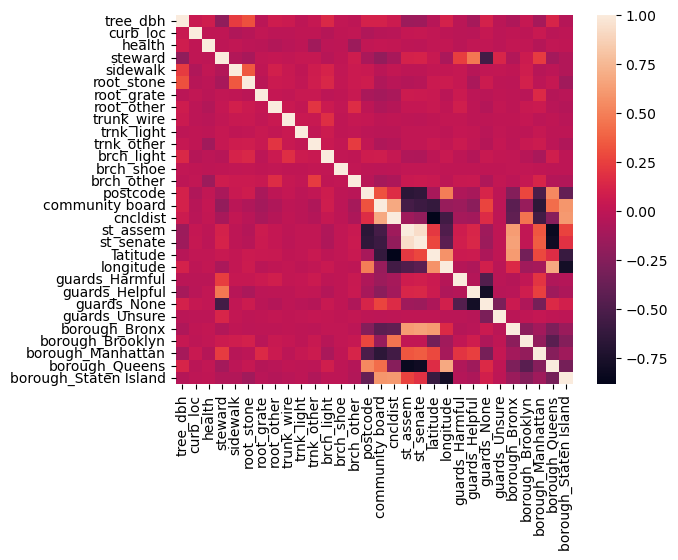

In [110]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [116]:
# Drop extra location data
tree_df_encoded_dropped = tree_df_encoded.drop(columns=[
    'postcode', 'community board', 'cncldist', 'st_assem', 'st_senate', 'nta'
])

In [125]:
tree_df_encoded_dropped['spc_common'].value_counts()

London planetree          87014
honeylocust               64262
Callery pear              58931
pin oak                   53185
Norway maple              34189
littleleaf linden         29742
cherry                    29279
Japanese zelkova          29258
ginkgo                    21024
Sophora                   19338
red maple                 17246
green ash                 16250
American linden           13530
silver maple              12277
sweetgum                  10657
northern red oak           8400
silver linden              7995
American elm               7975
maple                      7080
purple-leaf plum           6879
swamp white oak            6598
crimson king maple         5923
Chinese elm                5345
'Schubert' chokecherry     4888
Japanese tree lilac        4568
eastern redbud             3801
golden raintree            3719
crab apple                 3527
Kentucky coffeetree        3364
willow oak                 3184
dawn redwood               3020
hawthorn

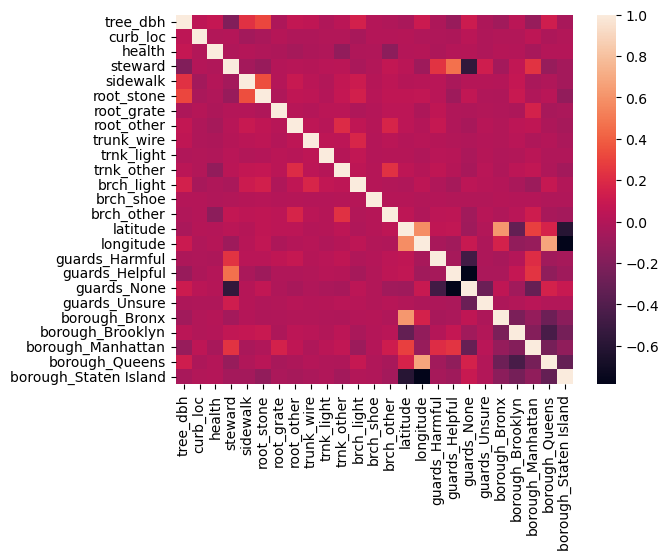

In [118]:
corr = tree_df_encoded_dropped.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [201]:
tree_X_tmp = tree_df_encoded_dropped.drop(columns=['health'])
tree_y_tmp = tree_df_encoded_dropped['health']

In [202]:
tree_X_tmp

,tree_dbh,curb_loc,spc_common,steward,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,guards_Harmful,guards_Helpful,guards_None,guards_Unsure,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,3,0.0,red maple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.723092,-73.844215,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,0.0,pin oak,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.794111,-73.818679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.0,honeylocust,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.717581,-73.936608,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,0.0,honeylocust,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.713537,-73.934456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21,0.0,American linden,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.666778,-73.975979,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,25,0.0,pin oak,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.713211,-73.954944,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
683784,7,0.0,Kentucky yellowwood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.715194,-73.856650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
683785,12,0.0,red maple,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.620762,-74.136517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
683786,9,0.0,red maple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.850828,-73.903115,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
